# PHASE 1 PROJECT

# IMPORTING MODULES

In [24]:
import pandas as pd

import sqlite3

import matplotlib.pyplot as plt

# LOADING DATASETS

In [4]:
file_path1= 'bom.movie_gross.csv'

df1= pd.read_csv(file_path1)

print(df1.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [5]:
file_path2= 'rt.movie_info.tsv'

df2= pd.read_csv(file_path2, sep='\t', encoding='latin-1')

print(df2.head())

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

In [6]:
file_path3= 'rt.reviews.tsv'

df3= pd.read_csv(file_path3, sep='\t', encoding='latin-1')

print(df3.head())

   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  


In [7]:
conn= sqlite3.connect('im.db')

cursor= conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

table_names= cursor.fetchall()

conn.close()

print("Tables in the database:")
for table_name in table_names:
    print(table_name[0])

Tables in the database:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [8]:
conn= sqlite3.connect('im.db')

tables_to_extract= ['movie_basics','movie_ratings']

dfs={}

for table_name in tables_to_extract:
    sql_query= f"SELECT* FROM {table_name}"
    
    dfs[table_name]= pd.read_sql(sql_query, conn)
    
conn.close()

df4= dfs['movie_ratings']
df5= dfs['movie_basics']

print(df4.head())

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


In [9]:
print("\nDataFrame for 'movie_basics':")
print(df5.head())


DataFrame for 'movie_basics':
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


# DATA CLEANING

# DF1

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We will deal with the missing values and drop duplicates as well as change the year data type to date-time format

In [11]:
#Dealing with missing values

df1['studio'].fillna('unknown', inplace=True)
df1['domestic_gross'].fillna(df1['domestic_gross'].mean(), inplace=True)

#Converting foreign gross to numeric

df1['foreign_gross']= pd.to_numeric(df1['foreign_gross'].astype(str).str.replace(',', ''), errors='coerce')

#Converting year to datetime format

df1['year']= pd.to_datetime(df1['year'], format='%Y', errors= 'coerce')

#Removing duplicates

df1_cleaned= df1.dropna().drop_duplicates()

df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           2037 non-null   object        
 1   studio          2037 non-null   object        
 2   domestic_gross  2037 non-null   float64       
 3   foreign_gross   2037 non-null   float64       
 4   year            2037 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 95.5+ KB


# DF2

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


There are missing values and wrong data types for box office, theatre date and run time

In [13]:
#Drop rows with missing values in the following columns:

columns= ['synopsis', 'rating', 'genre', 'director', 'theater_date', 'dvd_date', 'runtime']

df2_cleaned= df2.dropna(subset=columns).copy()

#Fill studio missing value with 'Unknown'

df2_cleaned['studio'].fillna('Unknown', inplace=True)

#Converting data types

df2_cleaned['box_office']= pd.to_numeric(df2_cleaned['box_office'].str.replace(',', ''), errors='coerce')

df2_cleaned['theater_date']= pd.to_datetime(df2_cleaned['theater_date'], errors='coerce')

df2_cleaned['dvd_date']= pd.to_datetime(df2_cleaned['dvd_date'], errors='coerce')

df2_cleaned['runtime']= pd.to_numeric(df2_cleaned['runtime'], errors='coerce')

df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1073 non-null   int64         
 1   synopsis      1073 non-null   object        
 2   rating        1073 non-null   object        
 3   genre         1073 non-null   object        
 4   director      1073 non-null   object        
 5   writer        881 non-null    object        
 6   theater_date  1073 non-null   datetime64[ns]
 7   dvd_date      1073 non-null   datetime64[ns]
 8   currency      293 non-null    object        
 9   box_office    293 non-null    float64       
 10  runtime       0 non-null      float64       
 11  studio        1073 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 109.0+ KB


# DF3

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


There is missing data and wrong data types for date and rating

In [15]:
#Drop missing values in certain columns

columns2= ['review', 'rating', 'critic', 'publisher']

df3_cleaned= df3.dropna(subset=columns2).copy()

#Convert rating and date to the correct data types

df3_cleaned['rating']= pd.to_numeric(df3_cleaned['rating'], errors='coerce')

df3_cleaned['date']= pd.to_datetime(df3_cleaned['date'], errors='coerce')

df3_cleaned['fresh'].unique()

df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          33988 non-null  int64         
 1   review      33988 non-null  object        
 2   rating      639 non-null    float64       
 3   fresh       33988 non-null  object        
 4   critic      33988 non-null  object        
 5   top_critic  33988 non-null  int64         
 6   publisher   33988 non-null  object        
 7   date        33988 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.3+ MB


# DS4

In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This data looks relatively clean
We won't do any more cleaning here

# DS5

In [17]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The above data has missing values and wrong data types for start year and runtime minutes

In [18]:
df5_cleaned= df5.dropna(subset=['original_title']).copy()

df5_cleaned['runtime_minutes'].fillna(df5_cleaned['runtime_minutes'].mean(), inplace=True)

df5_cleaned['genres'].fillna('Unknown', inplace=True)

df5_cleaned['movie_id']= df5_cleaned['movie_id'].astype(str)

df5_cleaned['start_year']= df5_cleaned['start_year'].astype(int)

df5_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int32  
 4   runtime_minutes  146123 non-null  float64
 5   genres           146123 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 7.2+ MB


# DATA EXPLORATION

In [20]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           2037 non-null   object        
 1   studio          2037 non-null   object        
 2   domestic_gross  2037 non-null   float64       
 3   foreign_gross   2037 non-null   float64       
 4   year            2037 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 95.5+ KB


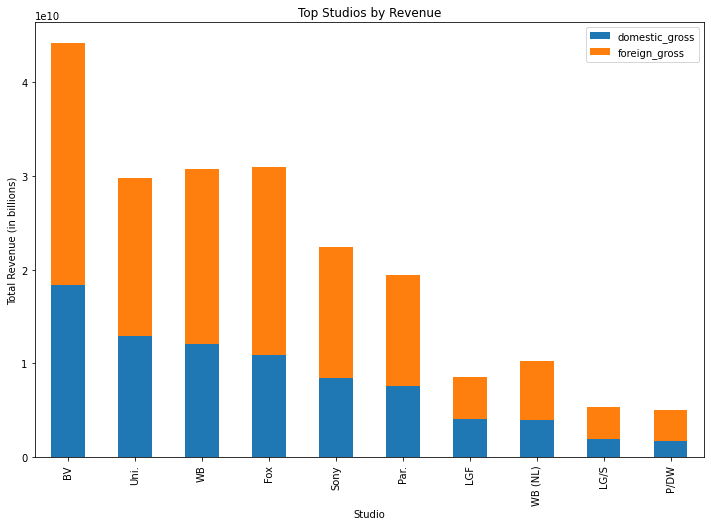

In [30]:
#Top studios by revenue

revenue_by_studio= df1_cleaned.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

top_studios= revenue_by_studio.sort_values(by='domestic_gross', ascending=False).head(10)

top_studios.plot(kind='bar', stacked=True, figsize=(12, 8), title='Top Studios by Revenue')
plt.xlabel('Studio')
plt.ylabel('Total Revenue (in billions)')
plt.show()


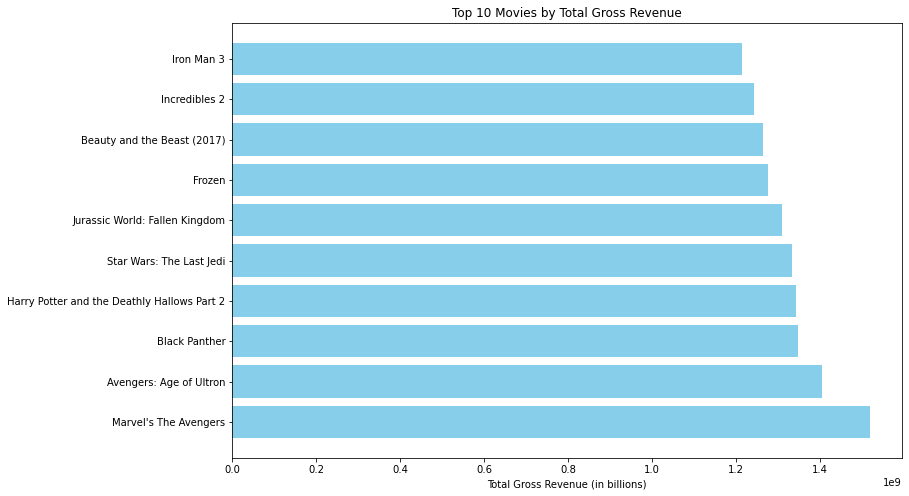

In [37]:
#Identify high performing movies 

df1_cleaned['total_gross']= df1_cleaned['domestic_gross'] + df1_cleaned['foreign_gross']

top_movies= df1_cleaned.sort_values(by='total_gross', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_movies['title'], top_movies['total_gross'], color='skyblue')
plt.xlabel('Total Gross Revenue (in billions)')
plt.title('Top 10 Movies by Total Gross Revenue')
plt.show()


In [38]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1073 non-null   int64         
 1   synopsis      1073 non-null   object        
 2   rating        1073 non-null   object        
 3   genre         1073 non-null   object        
 4   director      1073 non-null   object        
 5   writer        881 non-null    object        
 6   theater_date  1073 non-null   datetime64[ns]
 7   dvd_date      1073 non-null   datetime64[ns]
 8   currency      293 non-null    object        
 9   box_office    293 non-null    float64       
 10  runtime       0 non-null      float64       
 11  studio        1073 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 109.0+ KB


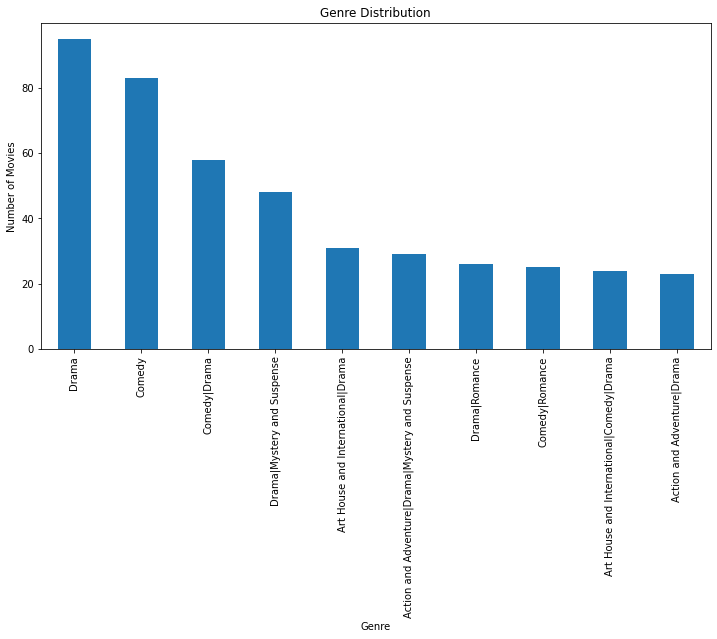

In [45]:
#Distribution of genres

genre_counts= df2_cleaned['genre'].value_counts()

top_genres= genre_counts.head(10)

top_genres.plot(kind='bar', figsize=(12, 6), title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.show()

DF4 and DF5 are tables from the same database. I want to merge the two

In [49]:
df_combined= pd.merge(df4,df5_cleaned, on='movie_id', how='inner')

df_combined

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.000000,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.000000,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.000000,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.000000,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.000000,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.000000,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.000000,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,86.186126,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.000000,Documentary


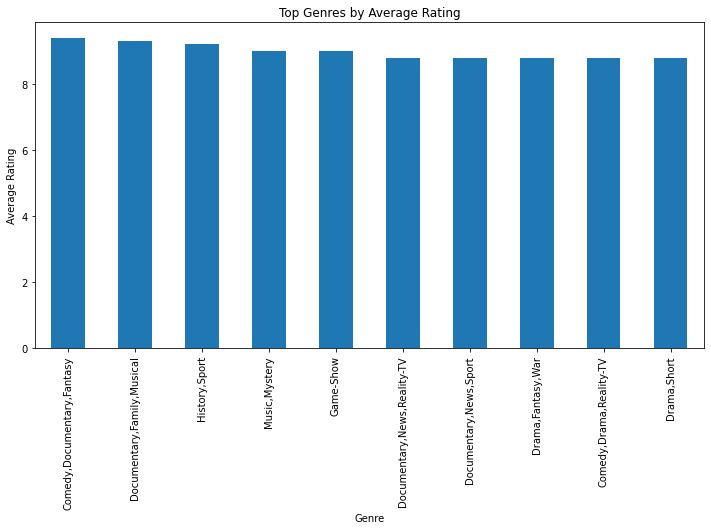

In [51]:
#Top genres by average rating

avg_rating_by_genre = df_combined.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)

avg_rating_by_genre.plot(kind='bar', figsize=(12, 6), title='Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


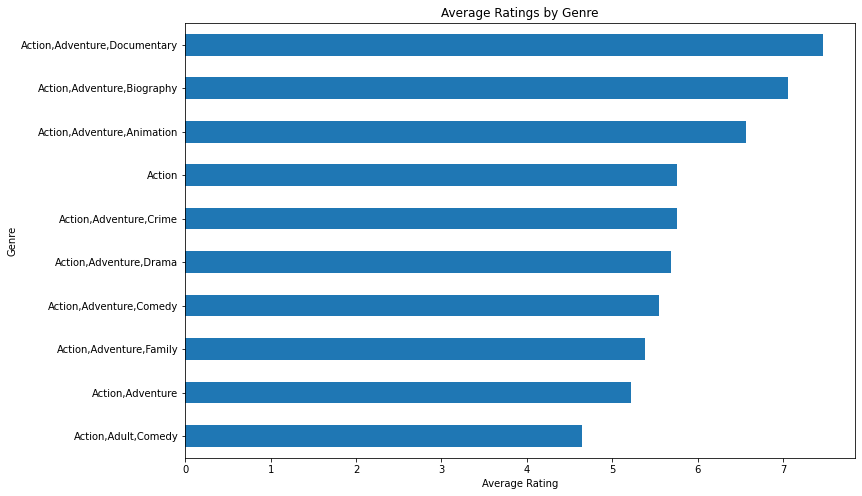

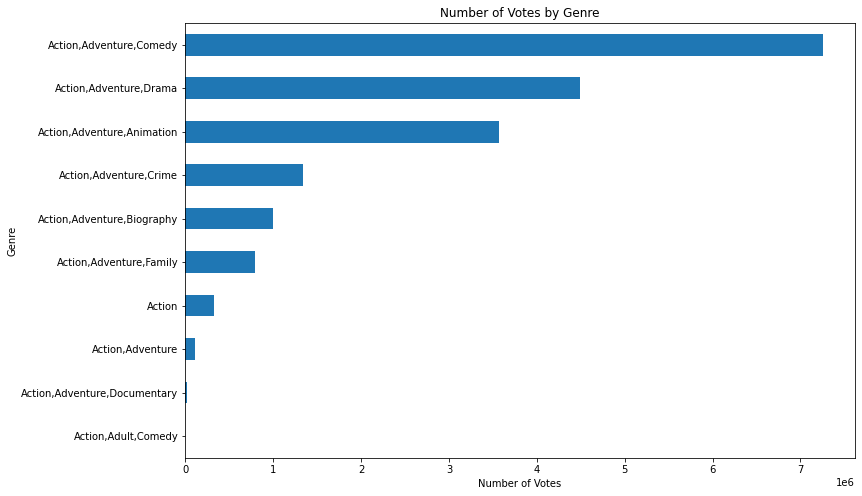

In [56]:
average_rating_by_genre = df_combined.groupby('genres')['averagerating'].mean().head(10)
num_votes_by_genre = df_combined.groupby('genres')['numvotes'].sum().head(10)

# Plot average ratings by genre
average_rating_by_genre.sort_values().plot(kind='barh', figsize=(12, 8), title='Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Plot number of votes by genre
num_votes_by_genre.sort_values().plot(kind='barh', figsize=(12, 8), title='Number of Votes by Genre')
plt.xlabel('Number of Votes')
plt.ylabel('Genre')
plt.show()

